# 부제 : 젠트리피케이션을 고려한 서울시 내 동단위 부동산 입지 추천 모델을 위한 분석 기반 구축

# 1. 데이터 수집

## 1-1. 데이터 수집 위치
상권관련 정보를 제공하고 있는 서울열린데이터광장(http://data.seoul.go.kr)에서 데이터 다운로드
총 18개의 데이터를 사용하였음

In [2]:
import IPython
url = 'http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-13275&srvType=S&serviceKind=1&currentPageNo=1'
iframe = """<style>
    #frame {
        -ms-zoom: 0.7;
        -moz-transform: scale(0.7);
        -moz-transform-origin: 0 0;
        -o-transform: scale(0.7);
        -o-transform-origin: 0 0;
        -webkit-transform: scale(0.7);
        -webkit-transform-origin: 0 0;
    }
</style>
<div id="frame">
    <iframe src=""" + url + """ width=1280 height=720></iframe>
</div>
    """
IPython.display.HTML(iframe)

## 1-2. 데이터 수집 방법
### 1-2-1. csv파일 다운로드 방식

![csv_download](./img/csv_download.png)

### 1-2-2. API 방식

#### 1-2-2-1. API 발급 사이트 : http://data.seoul.go.kr/openinf/develop/developer.jsp
#### 1-2-2-2. 발급 받은 API key를 이용한 데이터 수집

In [ ]:
import pandas as pd
import requests

restStr = 'http://openapi.seoul.go.kr:8088/<서울열린데이터광장에서 발급받은 api_key>/json/InfoTrdarStor/<fromIndex>/<toIndex>/<key value>'
r = requests.get(restStr)
x = r.json()
train = pd.DataFrame.from_dict(x, orient='index')

pd.DataFrame.from_dict(train['row'].iloc[0], orient='columns', dtype=None)

# 2. 데이터 가공 (변수 생성)

## 2-1. 데이터로드

### 2-1. 데이터설명

43개 생활밀착형 업종에 대한 1,008개 골목상권 영역
    - 분석대상 : 외식업 등 생활밀착형 가게 43개 업종
    
    • 구    분 : 지역
    • 데이터셋 명 : 골목상권영역 및 프로파일링
    • 자료유형 : 속성(csv), 도형(shp)
    • 시간범위 : 2015.6 ~ 2017.7
    • 공간범위 : 서울전역
    • 적재주기 : 반기
    • 제공기관 : 서울시
    • 데이터셋 설명 : 43개 생활밀착형 업종에 대한 1,008개 골목상권 영역
        - 분석대상 : 외식업 등 생활밀착형 가게 43개 업종
        ※ 좌표계 : Korea 2000 / Central Belt, EPSG : 5181

### 2-1-1. 주요 자료항목

테이블(파일) 목록

|구분|No|데이터셋 명|제공단위|데이터셋내용|
|---|--|--------|------|---------|
|상권<BR>(골목상권프로파일링)|1|골목상권영역|-|골목상권영역shape  파일|
||2|<B>상권-추정유동인구</B>|골목상권 단위|상권영역내 추정유동인구 정보|
||3|상권-직장인구|골목상권 단위|상권영역내 직장인구 정보|
||4|상권-상주인구|골목상권 단위|상권영역내 상주인구 정보|
||5|<B>상권-추정매출</B>|골목상권 단위|상권영역내 추정매출 정보|
||6|상권-소득소비|골목상권 단위|상권영역내 추정소득소비 정보|
||7|<B>상권-점포</B>|골목상권 단위|상권영역내 점포 정보|
||8|상권-아파트|골목상권 단위|상권영역내 아파트 통계 정보|
||9|상권-집객시설|골목상권 단위|상권영역내 집객시설 정보|
||10|상권-지수지표|골목상권 단위|상권의 과밀지수,  안정성지표, 활성도지표, 성장성지표 정보|
||11|상권배후지-아파트|골목상권 단위|상권배후지의 아파트  통계 정보|
||12|상권배후지-집객시설|골목상권 단위|상권배후지의 집객시설 정보|
||13|상권배후지-추정유동인구|골목상권 단위|상권배후지의 추정유동인구 정보|
||14|상권배후지-소득소비|골목상권 단위|상권배후지의 추정소득소비 정보|
||15|상권배후지-상주인구|골목상권 단위|상권배후지의 상주인구 정보|
||16|상권배후지-추정매출|골목상권 단위|상권배후지의 추정매출 정보|
||17|상권배후지-점포|골목상권 단위|상권배후지의 점포 정보|
||18|상권배후지-직장인구|골목상권 단위|상권배후지의 직장인구 정보|

생활밀착형 업종 3개 대분류, 43개 소분류

|생활밀착형 업종|
|-----------------|
|업종(대분류)|업종(소분류)|업종(대분류)|업종(소분류)|업종(대분류)|업종(소분류)|
|외식업(10)|한식음식점|서비스(22)|입시보습학원|도소매업(11)|슈퍼마켓|
||중국집||외국어학원||편의점|
||일식집||예체능학원||컴퓨터판매수리|
||양식집||치과의원||휴대폰|
||분식집||한의원||정육점|
||패스트푸드점||일반의원||과일채소|
||치킨집||보육시설||의류점|
||제과점||부동산중개업||패션잡화|
||커피음료||인테리어||약국|
||호프간이주점||노래방||문구점|
||||PC방||화장품|
||||당구장
||||골프연습장
||||헬스클럽
||||노인요양시설
||||미용실
||||네일숍
||||피부관리실
||||여관업
||||세탁소
||||자동차수리
||||자동차미용

### 2-1-2. 한글 파일명을 영문으로 변경

In [32]:
myvar = !ls data_bak
myvar[0:18]

['서울시 골목상권 프로파일 정보(상권-추정매출).csv',
 '서울시 골목상권 프로파일 정보(상권-집객시설).csv',
 '서울시 골목상권 프로파일 정보(상권-추정유동인구).csv',
 '서울시 골목상권 프로파일링 정보(상권-점포).csv',
 '서울시 골목상권 프로파일링 정보(상권-아파트).csv',
 '서울시 골목상권 프로파일링 정보(상권-지수지표).csv',
 '서울시 골목상권 프로파일링 정보(상권-소득소비).csv',
 '서울시 골목상권 프로파일링 정보(상권-상주인구).csv',
 '서울시 골목상권 프로파일링 정보(상권-직장인구).csv',
 '서울시 골목상권 프로파일링 정보(상권배후지-점포).csv',
 '서울시 골목상권 프로파일링 정보(상권배후지-아파트).csv',
 '서울시 골목상권 프로파일링 정보(상권배후지-소득소비).csv',
 '서울시 골목상권 프로파일링 정보(상권배후지-추정매출).csv',
 '서울시 골목상권 프로파일링 정보(상권배후지-상주인구).csv',
 '서울시 골목상권 프로파일링 정보(상권배후지-집객시설).csv',
 '서울시 골목상권 프로파일링 정보(상권배후지-직장인구).csv',
 '서울시 골목상권 프로파일링 정보(상권배후지-추정유동인구).csv',
 '서울시 우리마을가게 상권분석서비스-프로파일링데이터 정보.csv']

In [ ]:
%%bash
mv "./data/서울시 골목상권 프로파일 정보(상권-추정매출).csv" ./data/c-estimatedSales.csv
mv "./data/서울시 골목상권 프로파일 정보(상권-집객시설).csv" ./data/c-visitorFacility.csv
mv "./data/서울시 골목상권 프로파일 정보(상권-추정유동인구).csv" ./data/c-estimatedFloatingPopulation.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권-점포).csv" ./data/c-store.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권-아파트).csv" ./data/c-apartment.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권-소득소비).csv" ./data/c-incomeConsumption.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권-상주인구).csv" ./data/c-residentPopulation.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권-직장인구).csv" ./data/c-workPopulation.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권-지수지표).csv" ./data/c-indexOfIndices.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권배후지-점포).csv" ./data/nc-store.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권배후지-아파트).csv" ./data/nc-apartment.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권배후지-소득소비).csv" ./data/nc-incomeConsumption.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권배후지-추정매출).csv" ./data/nc-estimatedSales.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권배후지-상주인구).csv" ./data/nc-residentPopulation.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권배후지-집객시설).csv" ./data/nc-visitorFacility.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권배후지-직장인구).csv" ./data/nc-workPopulation.csv
mv "./data/서울시 골목상권 프로파일링 정보(상권배후지-추정유동인구).csv" ./data/nc-estimatedFloatingPopulation.csv
mv "./data/서울시 우리마을가게 상권분석서비스-프로파일링데이터 정보.csv" ./data/nc-profilingData.csv

In [33]:
# cEstimatedSales = pd.read_csv("./data/c-estimatedSales.csv")
cEstimatedSales = pd.read_csv("./data/InfoTrdarSelng_merged.csv")
cVisitorFacility = pd.read_csv("./data/c-visitorFacility.csv")
# cEstimatedFloatingPopulation = pd.read_csv("./data/c-estimatedFloatingPopulation.csv")
cEstimatedFloatingPopulation = pd.read_csv("./data/InfoTrdarFlpop_merged.csv")
# cStore = pd.read_csv("./data/c-store.csv")
cStore = pd.read_csv("./data/InfoTrdarStor_merged.csv")
cApartment = pd.read_csv("./data/c-apartment.csv")
cIncomeConsumption = pd.read_csv("./data/c-incomeConsumption.csv")
cResidentPopulation = pd.read_csv("./data/c-residentPopulation.csv")
cWorkPopulation = pd.read_csv("./data/c-workPopulation.csv")
cIndexOfIndices = pd.read_csv("./data/c-indexOfIndices.csv")
# ncStore = pd.read_csv("./data/nc-store.csv")
ncStore = pd.read_csv("./data/InfoTrdhlStor_merged.csv")
ncApartment = pd.read_csv("./data/nc-apartment.csv")
ncIncomeConsumption = pd.read_csv("./data/nc-incomeConsumption.csv")
# ncEstimatedSales = pd.read_csv("./data/nc-estimatedSales.csv")
ncEstimatedSales = pd.read_csv("./data/InfoTrdhlSelng_merged.csv")
ncResidentPopulation = pd.read_csv("./data/nc-residentPopulation.csv")
ncVisitorFacility = pd.read_csv("./data/nc-visitorFacility.csv")
ncWorkPopulation = pd.read_csv("./data/nc-workPopulation.csv")
# ncEstimatedFloatingPopulation = pd.read_csv("./data/nc-estimatedFloatingPopulation.csv", error_bad_lines=False)
ncEstimatedFloatingPopulation = pd.read_csv("./data/InfoTrdhlFlpop_merged.csv")
ncProfilingData = pd.read_csv("./data/nc-profilingData.csv")

## 2-2. 데이터 확인

### 2-2-1. 각 Dataframe별 변수 확인

각 Dataframe별 변수 속성 및 missing value확인

In [36]:
# Load in our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

np.set_printoptions(threshold=np.nan)

import matplotlib.font_manager as fm
font_dirs = ['/usr/share/fonts/', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

In [41]:
cVisitorFacility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30832 entries, 0 to 30831
Data columns (total 23 columns):
기준_년월_코드    30832 non-null int64
상권_코드       30832 non-null int64
상권_코드_명     30708 non-null object
집객시설_수      30832 non-null int64
관공서_수       3518 non-null float64
은행_수        9998 non-null float64
종합병원_수      165 non-null float64
일반_병원_수     1840 non-null float64
약국_수        21573 non-null float64
유치원_수       2908 non-null float64
초등학교_수      125 non-null float64
중학교_수       35 non-null float64
고등학교_수      88 non-null float64
대학교_수       75 non-null float64
백화점_수       33 non-null float64
슈퍼마켓_수      1937 non-null float64
극장_수        1740 non-null float64
숙박_시설_수     3546 non-null float64
공항_수        0 non-null float64
철도_역_수      139 non-null float64
버스_터미널_수    35 non-null float64
지하철_역_수     1164 non-null float64
버스_정거장_수    21634 non-null float64
dtypes: float64(19), int64(3), object(1)
memory usage: 5.4+ MB


In [40]:
cVisitorFacility.describe()

,기준_년월_코드,상권_코드,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
count,30832.000000,30832.000000,30832.000000,3518.000000,9998.000000,165.0,1840.000000,21573.000000,2908.000000,125.0,35.0,88.000000,75.00000,33.0,1937.000000,1740.000000,3546.000000,0.0,139.0,35.000000,1164.000000,21634.000000
mean,201588.555689,12821.955501,8.580793,1.264639,1.257151,1.0,1.071196,1.915589,1.085282,1.0,1.0,1.500000,1.12000,1.0,1.034590,1.731609,2.640158,NaN,1.0,1.114286,1.109966,2.999214
std,75.510577,489.660832,6.401031,0.608120,0.694645,0.0,0.257221,1.228058,0.294923,0.0,0.0,0.742781,0.32715,0.0,0.182785,2.312760,4.060434,NaN,0.0,0.471008,0.393328,2.393393
min,201501.000000,11947.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.00000,1.0,1.000000,1.000000,1.000000,NaN,1.0,1.000000,1.000000,1.000000
25%,201508.000000,12396.000000,4.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.00000,1.0,1.000000,1.000000,1.000000,NaN,1.0,1.000000,1.000000,1.000000
50%,201603.000000,12828.000000,7.000000,1.000000,1.000000,1.0,1.000000,2.000000,1.000000,1.0,1.0,1.000000,1.00000,1.0,1.000000,1.000000,1.000000,NaN,1.0,1.000000,1.000000,2.000000
75%,201612.000000,13242.000000,12.000000,1.000000,1.000000,1.0,1.000000,2.000000,1.000000,1.0,1.0,2.000000,1.00000,1.0,1.000000,1.000000,2.000000,NaN,1.0,1.000000,1.000000,4.000000
max,201707.000000,13651.000000,67.000000,10.000000,9.000000,1.0,2.000000,13.000000,3.000000,1.0,1.0,3.000000,2.00000,1.0,2.000000,15.000000,39.000000,NaN,1.0,3.000000,3.000000,21.000000


In [34]:
def show_missing_values_percents(dataframe):
    # load data
    df_train_cond = dataframe
    
    # print shape
    print(df_train_cond.shape)
    
    #missing data
    total = df_train_cond.isnull().sum().sort_values(ascending=False)
    percent = (df_train_cond.isnull().sum()/df_train_cond.isnull().count()*100).sort_values(ascending=False)
    
    fig,ax1= plt.subplots()
    fig.set_size_inches(40,5)
    
    pd.concat([percent], axis=1, keys=['Percent']).plot(kind='bar', ax=ax1)

(30832, 23)


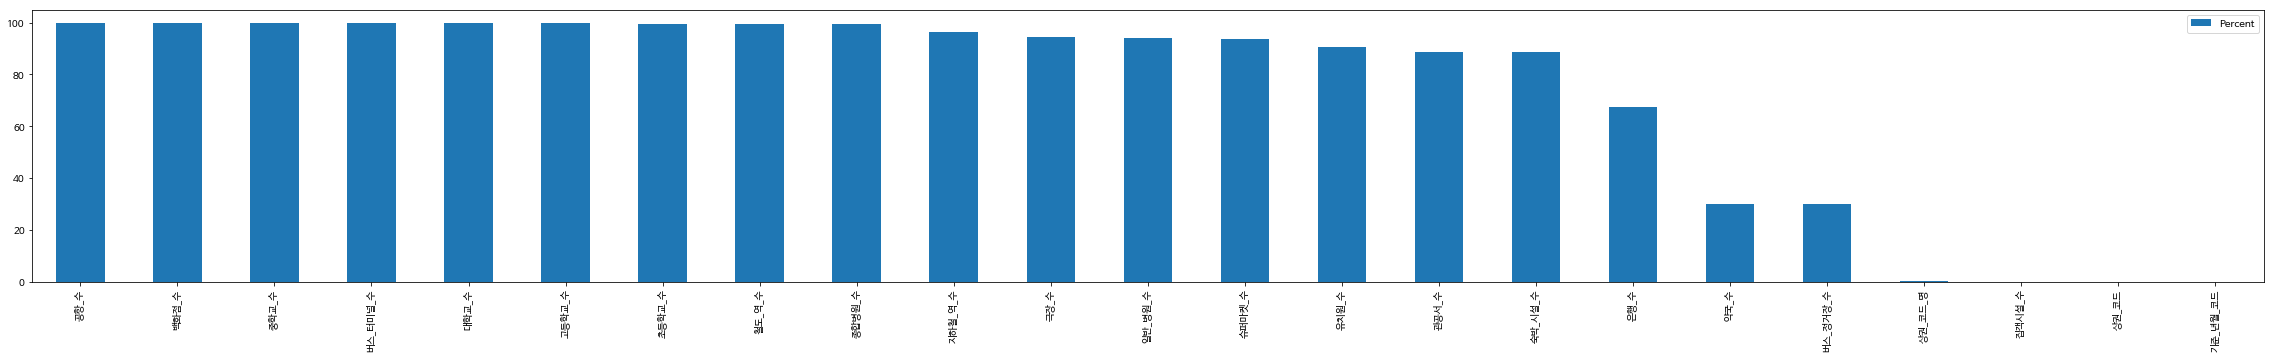

In [39]:
# missing value percentage
show_missing_values_percents(cVisitorFacility)

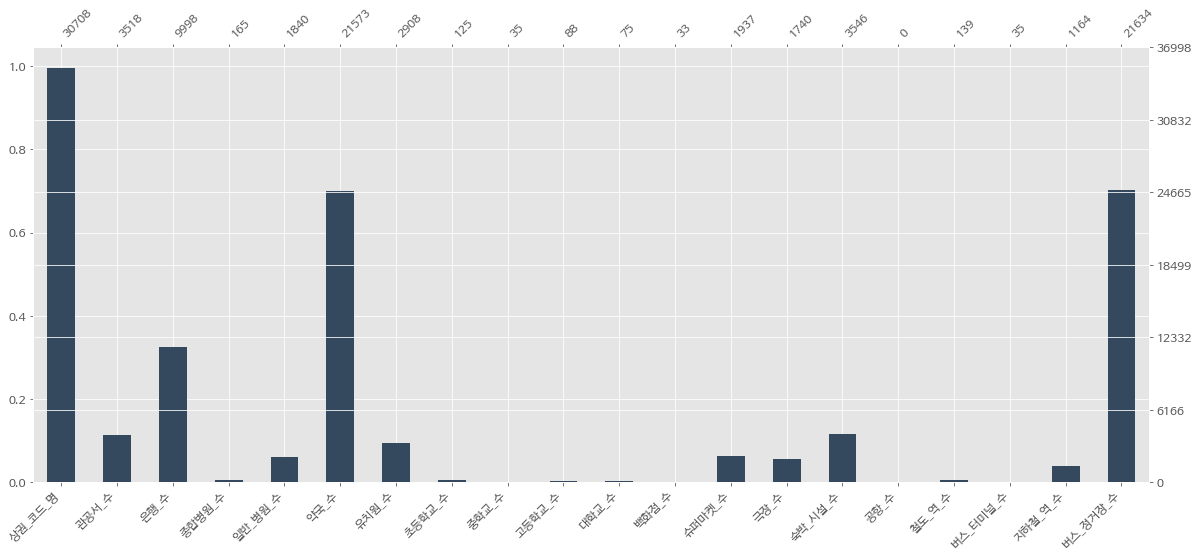

In [66]:
missingValueColumns = cVisitorFacility.columns[cVisitorFacility.isnull().any()].tolist()
msno.bar(cVisitorFacility[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=12,labels=True,)

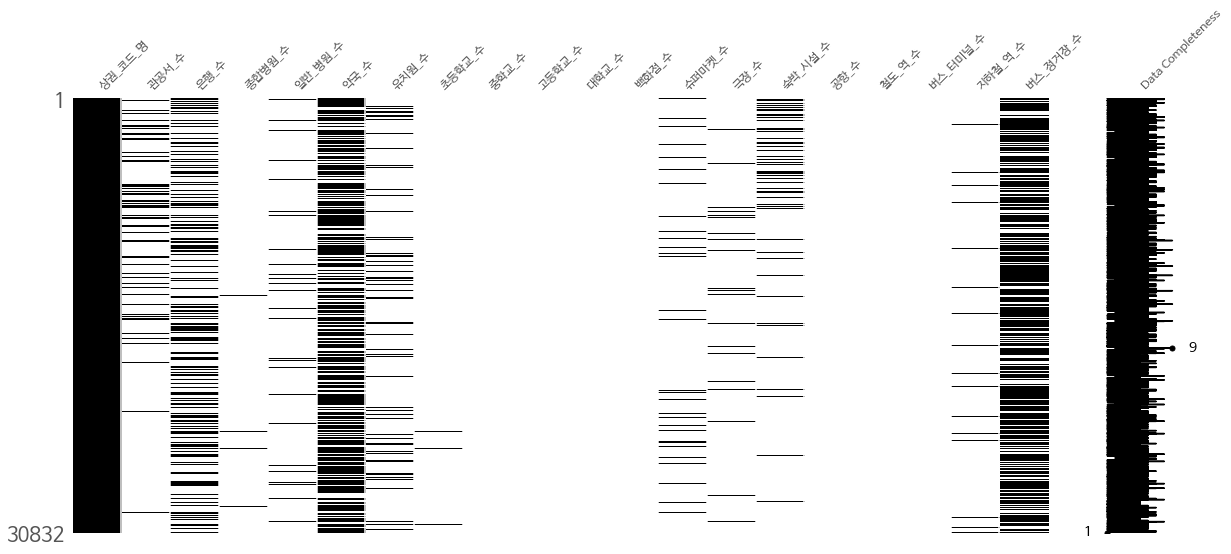

In [67]:
msno.matrix(cVisitorFacility[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=12,sparkline=True,labels=True)

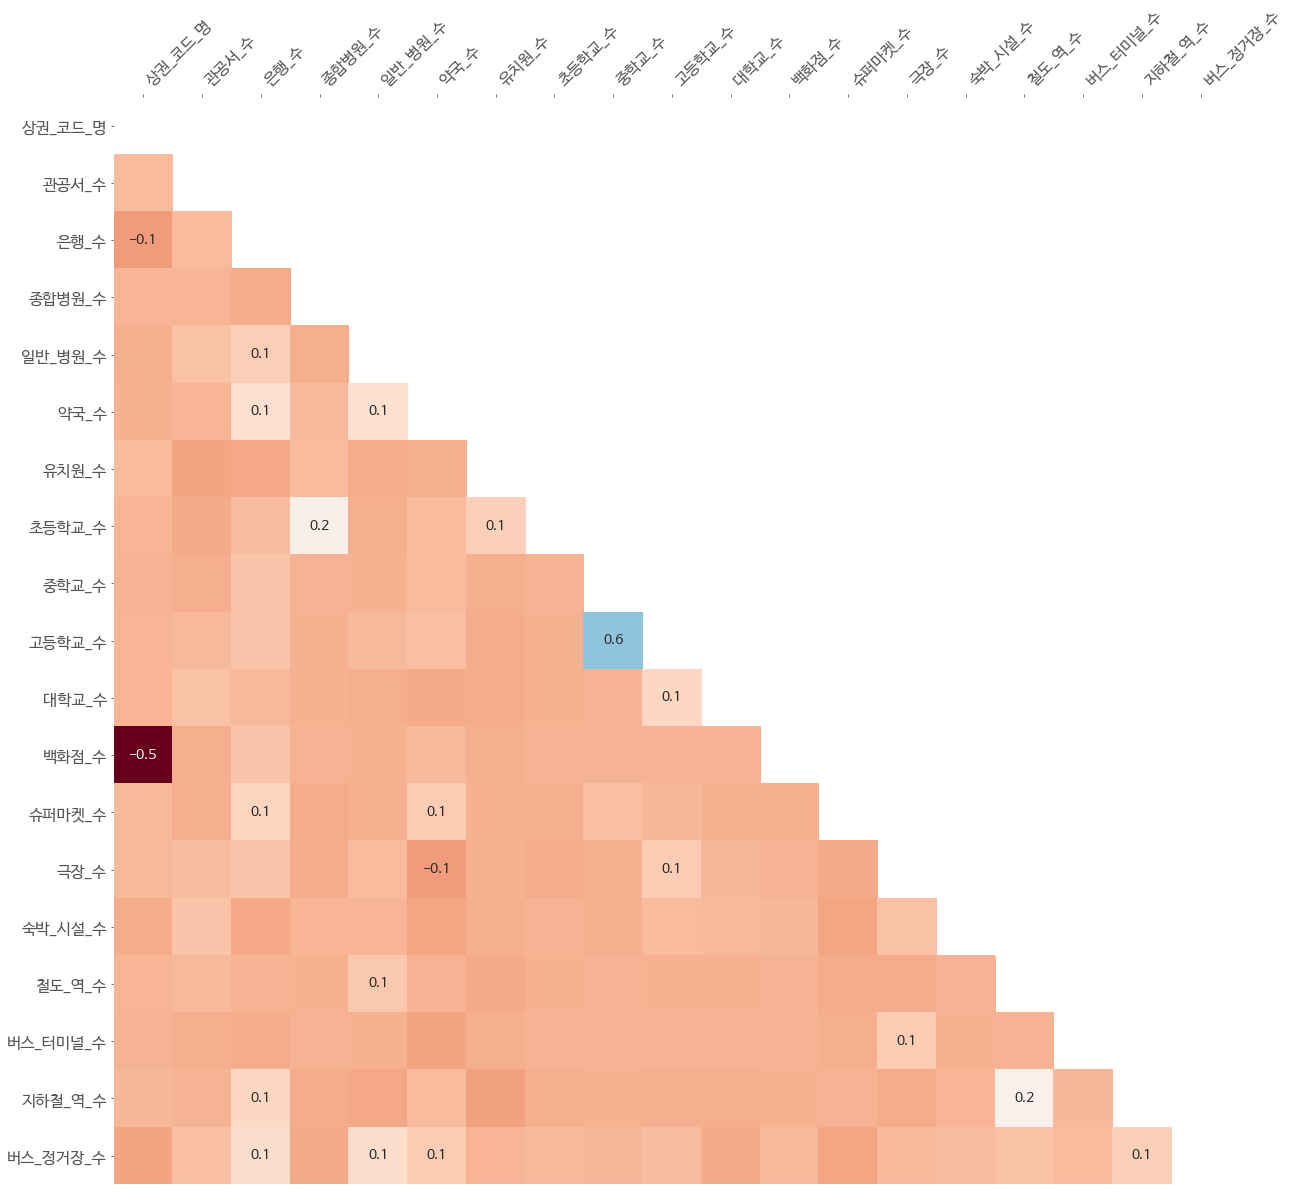

In [68]:
 msno.heatmap(cVisitorFacility[missingValueColumns],figsize=(20,20))

# 3. 데이터 정제

## 3-1. CSV에 없는 데이터 API로 받아서 병합

### 3-1-1. From To 일자, API 명 리스트로 전체 데이터 받기

In [ ]:
# 실제 API호출 함수
def mergeApiData(apiname, yyyymm, fr, to):
    restStr = 'http://openapi.seoul.go.kr:8088/7078577243616e673639696f616475/json/'+apiname+'/'+fr+'/'+to+'/'+yyyymm
    print(restStr)
    r = requests.get(restStr)
    x = r.json()
    train = pd.DataFrame.from_dict(x, orient='index')

    return pd.DataFrame.from_dict(train['row'].iloc[0], orient='columns', dtype=None)

# API를 호출하여 받아온 데이터를 CSV로 저장 함수
def save_store_data_as_csv(apiname, yyyyMM, divideBy1000):
    df = pd.DataFrame()

    for i in range(0, divideBy1000):
        fr = i*1000
        to = i*1000+999
        df1 = mergeApiData(apiname, yyyyMM, str(fr), str(to))
        df = pd.concat([df, df1])

    file_name = 'data/'+apiname+'_'+yyyyMM+'.csv'
    df.to_csv(file_name)

# 저장할 데이터의 api이름과 해당월의 크기를 체크하여 저장함수 호출
def getDataFromApi(apiname, yyyyMM):
    # check
    restStr = 'http://openapi.seoul.go.kr:8088/7078577243616e673639696f616475/json/'+apiname+'/1/5/'+yyyyMM
    print(restStr)
    r = requests.get(restStr)
    x = r.json()
    print(x)
    stored_yyyyMM = str(x[apiname]['row'][0]['STDR_YM_CD'])
    print(stored_yyyyMM)
    if stored_yyyyMM == yyyyMM :
        index = int(np.ceil(x[apiname]['list_total_count'] / 1000))
        print(str(x[apiname]['list_total_count'])+ " " + str(index))

        # 데이터 저장 함수 호출
        print(yyyyMM)
        save_store_data_as_csv(apiname, yyyyMM, index)
    else :
        print(yyyyMM + 'not stored')

In [ ]:
# 월별 데이터 저장
start_year = 2015
start_month = 6
end_year = 2017
end_month = 8
ym_start= 12*start_year + start_month - 1
ym_end= 12*end_year + end_month - 1
apinames = ['InfoTrdarSelng', 'InfoTrdarFlpop', 'InfoTrdarStor', 'InfoTrdhlStor', 'InfoTrdhlSelng', 'InfoTrdhlFlpop']
# 'InfoTrdarSelng' : 상권-추정매출
# 'InfoTrdarFlpop' : 상권-추정유동인구
# 'InfoTrdarStor' : 상권-점포
# 'InfoTrdhlStor' : 상권배후지-점포
# 'InfoTrdhlSelng' : 상권배후지-추정매출
# 'InfoTrdhlFlpop' : 상권배후지-추정유동인구

In [ ]:
for apiname in apinames :
    for ym in range( ym_start, ym_end ):
        y, m = divmod( ym, 12 )
        yyyyMM = '{:%Y%m}'.format(datetime(y, m+1, 1, 0, 0))
        try:
            getDataFromApi(apiname, yyyyMM)
        except:
            try:
                getDataFromApi(apiname, yyyyMM)
            except:
                pass

### 3-1-2. API 명으로 개발 데이터 받기

In [ ]:
# 개별 데이터 받기
apiname='InfoTrdarStor'
yyyyMM = '201510'

# check
restStr = 'http://openapi.seoul.go.kr:8088/7078577243616e673639696f616475/json/'+apiname+'/1/5/'+yyyyMM
print(restStr)
r = requests.get(restStr)
x = r.json()
print(x)

index = int(np.ceil(x[apiname]['list_total_count'] / 1000))
print(str(x[apiname]['list_total_count'])+ " " + str(index))

# 데이터 저장 함수 호출
print(yyyyMM)
save_store_data_as_csv(apiname, yyyyMM, index)

## 3-2. 받은 파일 체크

In [ ]:
# 저장한 파일 체크
file_name = 'data/'+apiname+'_'+yyyyMM+'.csv'
print(file_name)
rDf = pd.read_csv(file_name)
print(rDf.shape)
drop_df = rDf.drop_duplicates(subset=['STDR_YM_CD','SVC_INDUTY_CD','TRDAR_CD'], keep='first', inplace=False)
drop_df.shape

## 3-3. 월별로 받은 데이터 병합

In [ ]:
# 월별 저장된 파일 병합
def get_dataframe(prefix, yyyyMM):
    return pd.read_csv(prefix+str(yyyyMM)+'.csv')

def merge_dataframe(df_base, yyyyMM, apiname):
    new_df = get_dataframe('data/'+apiname+'_', yyyyMM)
    return pd.concat([df_base, new_df])

def merge_store_data(apiname):
    df_base = pd.DataFrame()

    for ym in range( ym_start, ym_end ):
        y, m = divmod( ym, 12 )
        yyyyMM = '{:%Y%m}'.format(datetime(y, m+1, 1, 0, 0))
        
        df_base = merge_dataframe(df_base, yyyyMM, apiname)
        print(str(yyyyMM)+" "+str(df_base.shape))

    return df_base

for apiname in apinames:
    # 전체 데이터 merge
    merged_df = merge_store_data(apiname)

    # merge 된 데이터 크기 확인
    print(merged_df.shape)
    drop_df = merged_df.drop_duplicates(subset=['STDR_YM_CD','SVC_INDUTY_CD','TRDAR_CD'], keep='first', inplace=False)
    print(drop_df.shape)
    
    # merge data 저장
    file_name = 'data/'+apiname+'_merged.csv'
    merged_df.to_csv(file_name)
    print(file_name+' saved')

# 4. 데이터 EDA

## 4-1. 젠트리피케이션 기준 데이터

### 2017년 3분기 기준 서울시(전체) 각 구별 프렌차이즈 점포비율
출처 : 서울시 자치구별 상권지표 리포트

In [43]:
franchise_rate = pd.read_csv("data/seoul_franchise_encoding.csv")
franchise_rate

,자치구,SIGNGU_CD,전체점포수,프랜차이즈점포수,일반점포수,전월대비증감,전년동월증감,프랜차이즈비율
0,서울시(전체),11,388261,34345,353916,-550,-429,0.088
1,동작구,11590,11479,1236,10243,-11,13,0.108
2,강서구,11500,17428,1790,15638,-5,366,0.103
3,서대문구,11410,10950,1114,9836,-45,-74,0.102
4,노원구,11350,13964,1411,12553,-40,-47,0.101
5,관악구,11620,14570,1453,13117,-39,-66,0.100
6,송파구,11710,23012,2245,20767,8,364,0.098
7,성북구,11290,12746,1243,11503,-34,-215,0.098
8,강동구,11740,15320,1457,13863,-38,-252,0.095
9,광진구,11215,13679,1298,12381,-33,-102,0.095


In [44]:
street_code = pd.read_csv("data/street_code.csv")
street_code.head(5)

,TRDAR_CD,ALLEY_TRDAR_NM,SIGNGU_CD,ADSTRD_CD,SIGNGU_CD_NM,ADSTRD_CD_NM
0,12285,자하문로_A,11110,11110515,종로구,청운효자동
1,12311,자하문로_B,11110,11110515,종로구,청운효자동
2,12366,자하문로7길,11110,11110515,종로구,청운효자동
3,12339,사직로8길,11110,11110530,종로구,사직동
4,12292,자하문로9길,11110,11110530,종로구,사직동


In [45]:
franchise_rate_gu = franchise_rate[(franchise_rate['자치구']!='서울시(전체)')]
franchise_rate_gu.자치구.unique()

array(['동작구', '강서구', '서대문구', '노원구', '관악구', '송파구', '성북구', '강동구', '광진구',
       '구로구', '영등포구', '마포구', '양천구', '성동구', '서초구', '은평구', '금천구', '강남구',
       '도봉구', '강북구', '동대문구', '중랑구', '종로구', '용산구', '중구'], dtype=object)

In [46]:
print(franchise_rate.shape)
print(street_code.shape)

(26, 8)
(1471, 6)


In [47]:
merge1 = pd.merge(franchise_rate_gu[['SIGNGU_CD','프랜차이즈비율']], street_code[['SIGNGU_CD','TRDAR_CD']], how='outer', on=['SIGNGU_CD'])
print(merge1.shape)

(1471, 3)


In [48]:
tp = pd.io.parsers.read_csv("data/merge_final_2.csv", iterator=True, chunksize=1000)
total_data = pd.concat(tp, ignore_index=True)
total_data_merged = pd.merge(merge1, total_data, how='outer', on=['TRDAR_CD'])

In [50]:
total_data_merged = total_data_merged.drop('Unnamed: 0', 1)
total_data_merged.shape

(1037862, 40)

In [51]:
coffee_data = total_data_merged[(total_data_merged['SVC_INDUTY_CD']=='CS100009')]

In [53]:
coffee_data['gentri_idx'] = 0
coffee_data['gentri_idx'] = np \
.where((coffee_data['프랜차이즈비율'] > 0) & (coffee_data['프랜차이즈비율'] <= 0.085), 1, coffee_data['gentri_idx'])
coffee_data['gentri_idx'] = np \
.where((coffee_data['프랜차이즈비율'] > 0.085) & (coffee_data['프랜차이즈비율'] <= 0.092), 2, coffee_data['gentri_idx'])
coffee_data['gentri_idx'] = np \
.where((coffee_data['프랜차이즈비율'] > 0.092) & (coffee_data['프랜차이즈비율'] <= 0.098), 3, coffee_data['gentri_idx'])
coffee_data['gentri_idx'] = np \
.where((coffee_data['프랜차이즈비율'] > 0.098) & (coffee_data['프랜차이즈비율'] <= 100), 4, coffee_data['gentri_idx'])

/home/ec2-user/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ec2-user/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [54]:
coffee_data.groupby(['gentri_idx']).count()

,SIGNGU_CD,프랜차이즈비율,TRDAR_CD,STDR_YM_CD,SVC_INDUTY_CD,STOR_CO,OPBIZ_RT,CLSBIZ_RT,SIMILR_INDUTY_STOR_CO,OPBIZ_STOR_CO,CLSBIZ_STOR_CO,TOT_FLPOP_CO,FML_FLPOP_CO,AGRDE_20_FLPOP_CO,TRDAR_CD_NM,SVC_INDUTY_CD_NM,AVRG_BSN_MONTH_CO,YEAR_1_BEING_RT,YEAR_1_2_BEING_RT,YEAR_2_3_BEING_RT,YEAR_3_5_BEING_RT,YEAR_5_BEING_RT,THSMON_SELNG_CO,MDWK_SELNG_CO,WKEND_SELNG_CO,MON_SELNG_CO,TUES_SELNG_CO,WED_SELNG_CO,THUR_SELNG_CO,FRI_SELNG_CO,SAT_SELNG_CO,SUN_SELNG_CO,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO
gentri_idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184,8184
2,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817
3,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648
4,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161


## 4-2. 데이터 타입 시각화

출처 : https://www.kaggle.com/viveksrinivasan/zillow-eda-on-missing-values-multicollinearity

In [56]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import warnings
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline

In [58]:
coffee_data.columns

Index(['SIGNGU_CD', '프랜차이즈비율', 'TRDAR_CD', 'STDR_YM_CD', 'SVC_INDUTY_CD',
       'STOR_CO', 'OPBIZ_RT', 'CLSBIZ_RT', 'SIMILR_INDUTY_STOR_CO',
       'OPBIZ_STOR_CO', 'CLSBIZ_STOR_CO', 'TOT_FLPOP_CO', 'FML_FLPOP_CO',
       'AGRDE_20_FLPOP_CO', 'TRDAR_CD_NM', 'SVC_INDUTY_CD_NM',
       'AVRG_BSN_MONTH_CO', 'YEAR_1_BEING_RT', 'YEAR_1_2_BEING_RT',
       'YEAR_2_3_BEING_RT', 'YEAR_3_5_BEING_RT', 'YEAR_5_BEING_RT',
       'THSMON_SELNG_CO', 'MDWK_SELNG_CO', 'WKEND_SELNG_CO', 'MON_SELNG_CO',
       'TUES_SELNG_CO', 'WED_SELNG_CO', 'THUR_SELNG_CO', 'FRI_SELNG_CO',
       'SAT_SELNG_CO', 'SUN_SELNG_CO', 'ML_SELNG_CO', 'FML_SELNG_CO',
       'AGRDE_10_SELNG_CO', 'AGRDE_20_SELNG_CO', 'AGRDE_30_SELNG_CO',
       'AGRDE_40_SELNG_CO', 'AGRDE_50_SELNG_CO', 'AGRDE_60_ABOVE_SELNG_CO',
       'gentri_idx'],
      dtype='object')

In [59]:
coffee_data.describe()

,SIGNGU_CD,프랜차이즈비율,TRDAR_CD,STDR_YM_CD,STOR_CO,OPBIZ_RT,CLSBIZ_RT,SIMILR_INDUTY_STOR_CO,OPBIZ_STOR_CO,CLSBIZ_STOR_CO,TOT_FLPOP_CO,FML_FLPOP_CO,AGRDE_20_FLPOP_CO,AVRG_BSN_MONTH_CO,YEAR_1_BEING_RT,YEAR_1_2_BEING_RT,YEAR_2_3_BEING_RT,YEAR_3_5_BEING_RT,YEAR_5_BEING_RT,THSMON_SELNG_CO,MDWK_SELNG_CO,WKEND_SELNG_CO,MON_SELNG_CO,TUES_SELNG_CO,WED_SELNG_CO,THUR_SELNG_CO,FRI_SELNG_CO,SAT_SELNG_CO,SUN_SELNG_CO,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO,gentri_idx
count,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000,29810.000000
mean,11466.021302,0.091329,12813.506474,201596.970882,3.880845,1.995669,0.684272,2.178329,0.055954,0.026132,4718.474505,2365.007950,843.148071,71.356773,21.888463,24.384947,19.335653,22.742731,18.662858,3893.788326,2811.726065,1082.097853,545.660181,559.457531,565.237336,565.915364,575.590808,559.326736,522.801879,1563.737202,2057.002684,85.108386,1349.865280,1104.461389,652.622543,326.269641,102.988695,2.361825
std,187.459124,0.009845,487.051872,71.055618,3.267763,10.376623,4.866804,2.033765,0.243309,0.162861,4320.135171,2207.159491,1025.261550,79.958630,30.211462,38.602705,36.833002,38.607568,34.451370,4912.237912,3632.081920,1421.398996,723.133259,734.248565,740.459758,744.054421,736.253342,734.790610,699.763578,1980.365851,2766.350528,234.427593,2245.167719,1339.720195,781.796639,408.315449,138.889267,1.092418
min,11110.000000,0.054000,11947.000000,201506.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,1.000000
25%,11290.000000,0.085000,12397.000000,201511.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2134.000000,1054.000000,265.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,587.250000,432.000000,114.000000,78.000000,81.000000,84.000000,83.000000,86.000000,69.000000,26.000000,230.000000,289.000000,0.000000,125.000000,156.000000,105.000000,50.000000,14.000000,1.000000
50%,11500.000000,0.092000,12816.000000,201605.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3996.000000,1994.000000,610.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409.000000,1697.000000,628.000000,320.000000,335.000000,337.000000,336.000000,347.000000,327.000000,298.500000,974.000000,1228.500000,25.000000,674.000000,684.000000,416.000000,209.000000,61.000000,2.000000
75%,11650.000000,0.098000,13232.000000,201612.000000,5.000000,0.000000,0.000000,3.000000,0.000000,0.000000,6312.750000,3163.000000,1081.000000,104.000000,37.500000,50.000000,0.000000,50.000000,25.000000,5418.750000,3855.750000,1494.000000,750.000000,762.000000,772.000000,769.000000,793.000000,766.000000,727.750000,2147.750000,2838.500000,93.000000,1704.000000,1562.000000,909.750000,447.000000,140.000000,3.000000
max,11740.000000,0.108000,13651.000000,201707.000000,34.000000,100.000000,100.000000,17.000000,3.000000,2.000000,93569.000000,50766.000000,20402.000000,762.000000,100.000000,100.000000,100.000000,100.000000,100.000000,76825.000000,60582.000000,21425.000000,14084.000000,14402.000000,13709.000000,14067.000000,11214.000000,11279.000000,10147.000000,34156.000000,62460.000000,10955.000000,47005.000000,20098.000000,9449.000000,5411.000000,3318.000000,4.000000


[Text(0,0.5,'Count'),
 Text(0.5,0,'Variable Type'),
 Text(0.5,1,'Variables Count Across Datatype')]

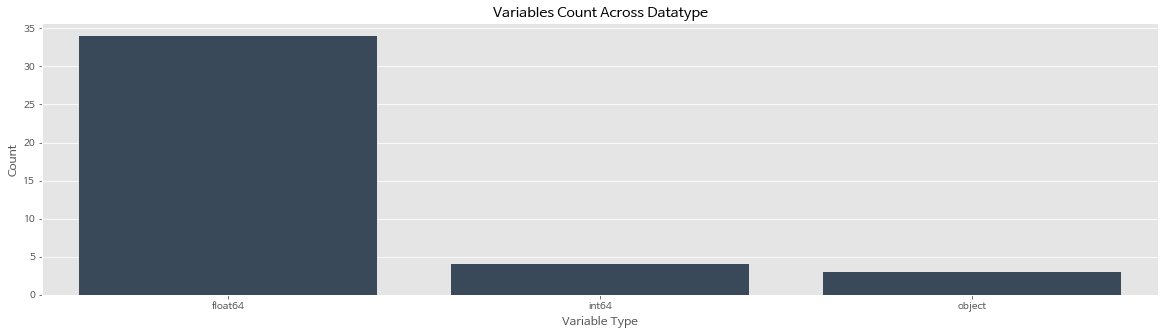

In [57]:
dataTypeDf = pd.DataFrame(coffee_data.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax,color="#34495e")
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

In [77]:
from sklearn import model_selection, preprocessing
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

train_X=coffee_data.loc[:, coffee_data.columns != 'gentri_idx'].select_dtypes(include=['float64'])
train_y=coffee_data['gentri_idx']

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

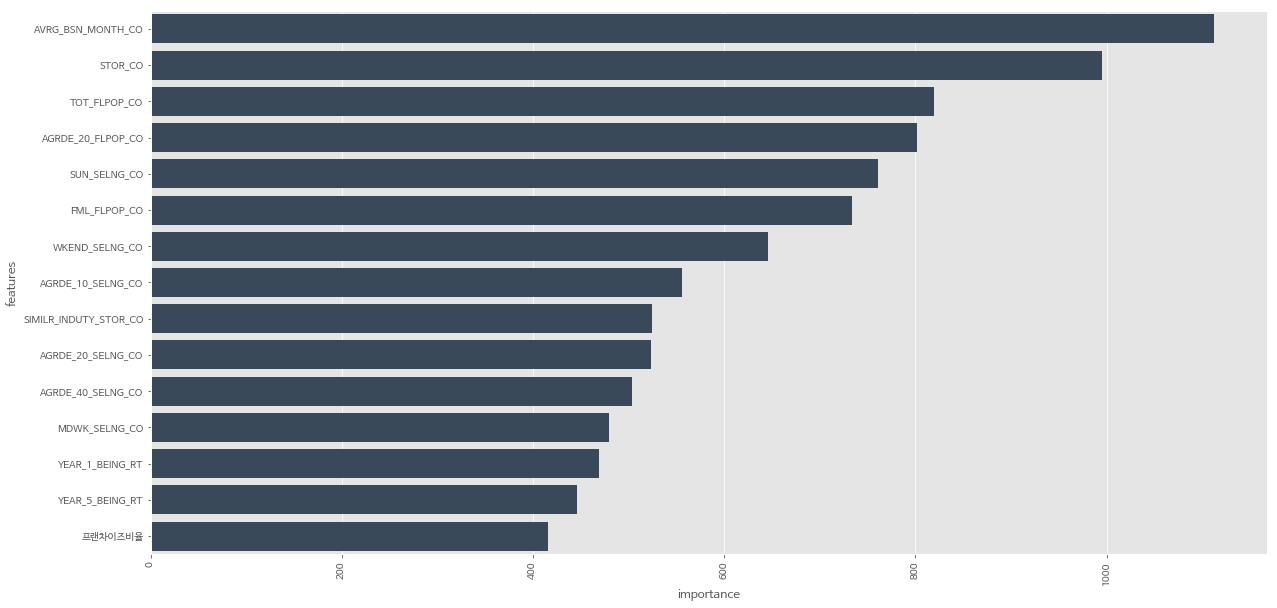

In [78]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sn.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h",color="#34495e")

## 4-3. 상관계수 분석

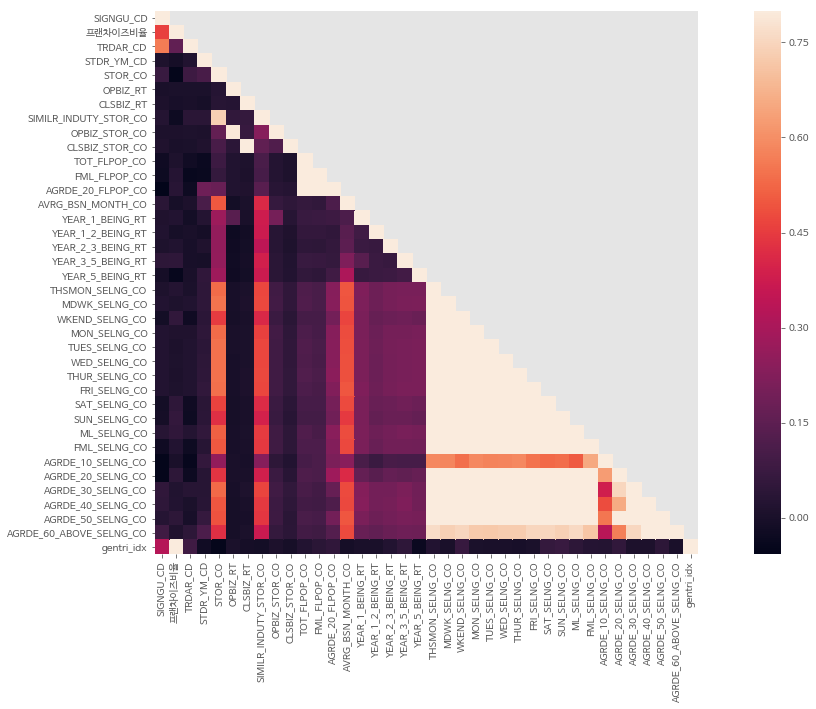

In [75]:
corrMatt = coffee_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True)

## 4-4. 다중공선성 분석

[Text(0,0.5,'Features'), Text(0.5,0,'VIF Scores'), Text(0.5,1,'다중공선성이 많은 데이터')]

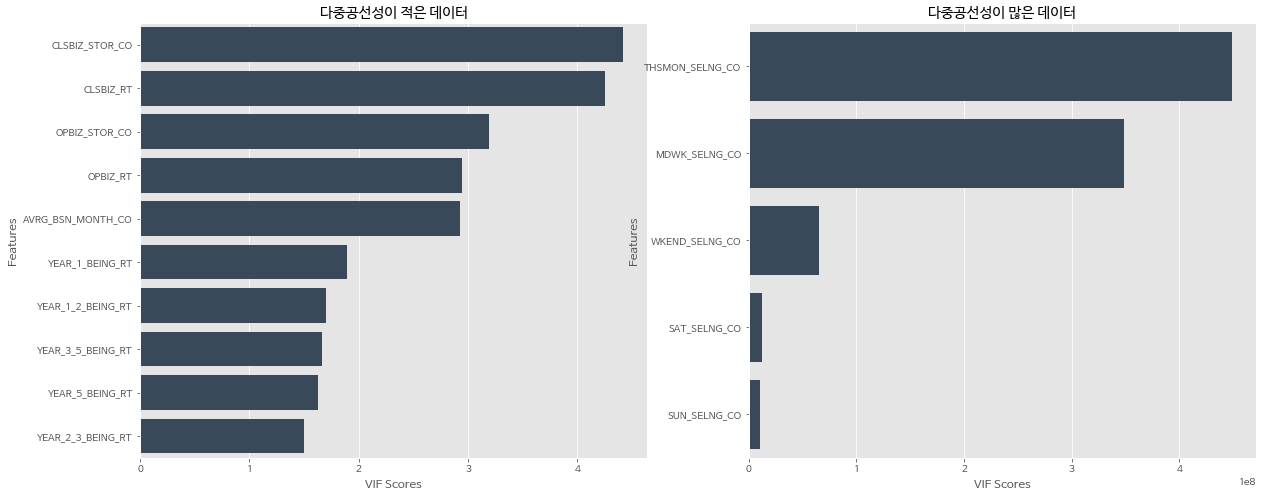

In [84]:
# 참조 : http://blog.naver.com/PostView.nhn?blogId=yonxman&logNo=220967050794&parentCategoryNo=&categoryNo=1&viewDate=&isShowPopularPosts=false&from=section


from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
warnings.filterwarnings("ignore")

def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif

corr_data=coffee_data.loc[:, coffee_data.columns != 'gentri_idx'].select_dtypes(include=['float64'])
corr_data['gentri_idx']=coffee_data['gentri_idx']

numericalCol = []
vifDict = calculate_vif_(corr_data)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sn.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#34495e")
sn.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="다중공선성이 적은 데이터")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="다중공선성이 많은 데이터")

# 5. 데이터 분류 예시

In [142]:
# train / test 데이터 분류
train = coffee_data[(coffee_data['STDR_YM_CD']  < 201701)]
test = coffee_data[(coffee_data['STDR_YM_CD']  >= 201701)]

In [143]:
X=train.loc[:, train.columns != 'gentri_idx'].select_dtypes(include=['float64'])
y=train['gentri_idx']

In [144]:
print(X.shape)
print(X.columns)

(23183, 34)
Index(['프랜차이즈비율', 'STOR_CO', 'OPBIZ_RT', 'CLSBIZ_RT', 'SIMILR_INDUTY_STOR_CO',
       'OPBIZ_STOR_CO', 'CLSBIZ_STOR_CO', 'TOT_FLPOP_CO', 'FML_FLPOP_CO',
       'AGRDE_20_FLPOP_CO', 'AVRG_BSN_MONTH_CO', 'YEAR_1_BEING_RT',
       'YEAR_1_2_BEING_RT', 'YEAR_2_3_BEING_RT', 'YEAR_3_5_BEING_RT',
       'YEAR_5_BEING_RT', 'THSMON_SELNG_CO', 'MDWK_SELNG_CO', 'WKEND_SELNG_CO',
       'MON_SELNG_CO', 'TUES_SELNG_CO', 'WED_SELNG_CO', 'THUR_SELNG_CO',
       'FRI_SELNG_CO', 'SAT_SELNG_CO', 'SUN_SELNG_CO', 'ML_SELNG_CO',
       'FML_SELNG_CO', 'AGRDE_10_SELNG_CO', 'AGRDE_20_SELNG_CO',
       'AGRDE_30_SELNG_CO', 'AGRDE_40_SELNG_CO', 'AGRDE_50_SELNG_CO',
       'AGRDE_60_ABOVE_SELNG_CO'],
      dtype='object')


In [103]:
print(y.shape)

(23183,)


In [145]:
sX, sy = make_classification(n_samples=1000, n_features=4, \
                            n_informative=2, n_redundant=0, \
                            random_state=0, shuffle=False)

In [146]:
sX

array([[ -1.66853167e+00,  -1.29901346e+00,   2.74647204e-01,
         -6.03620436e-01],
       [ -2.97288270e+00,  -1.08878294e+00,   7.08859575e-01,
          4.22818575e-01],
       [ -5.96141255e-01,  -1.37007001e+00,  -3.11685659e+00,
          6.44452033e-01],
       [ -1.06894674e+00,  -1.17505738e+00,  -1.91374267e+00,
          6.63561577e-01],
       [ -1.30526888e+00,  -9.65925657e-01,  -1.54072398e-01,
          1.19361168e+00],
       [ -2.18261832e+00,  -9.70113869e-01,  -9.81612112e-02,
         -8.86614260e-01],
       [ -1.24797892e+00,  -1.13094525e+00,  -1.47353665e-01,
          1.05980629e+00],
       [ -1.35308792e+00,  -1.06633681e+00,   2.62466179e-02,
         -1.14335160e-01],
       [ -1.13449871e+00,  -1.27403448e+00,   7.43553516e-01,
          2.10359367e-01],
       [ -3.84574453e-01,  -1.08840346e+00,  -5.92740583e-03,
          1.36606007e+00],
       [ -1.01065060e+00,  -5.20170710e-01,   1.55511403e+00,
          6.13326226e-01],
       [ -5.83101550e

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [105]:
print(clf.feature_importances_)

[ 0.19511057  0.          0.          0.          0.04925334  0.          0.
  0.16291211  0.02898596  0.03400338  0.02881128  0.          0.          0.
  0.          0.04973141  0.02570573  0.01871417  0.          0.03101845
  0.01679279  0.          0.          0.03830457  0.          0.12634994
  0.02419554  0.00094173  0.          0.09389325  0.04669488  0.          0.0285809
  0.        ]


In [107]:
test_X=testDF.loc[:, testDF.columns != 'gentri_idx'].select_dtypes(include=['float64'])
test_y=testDF['gentri_idx']

In [108]:
test_X.head(1)

,프랜차이즈비율,STOR_CO,OPBIZ_RT,CLSBIZ_RT,SIMILR_INDUTY_STOR_CO,OPBIZ_STOR_CO,CLSBIZ_STOR_CO,TOT_FLPOP_CO,FML_FLPOP_CO,AGRDE_20_FLPOP_CO,AVRG_BSN_MONTH_CO,YEAR_1_BEING_RT,YEAR_1_2_BEING_RT,YEAR_2_3_BEING_RT,YEAR_3_5_BEING_RT,YEAR_5_BEING_RT,THSMON_SELNG_CO,MDWK_SELNG_CO,WKEND_SELNG_CO,MON_SELNG_CO,TUES_SELNG_CO,WED_SELNG_CO,THUR_SELNG_CO,FRI_SELNG_CO,SAT_SELNG_CO,SUN_SELNG_CO,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO
1079,0.108,7.0,0.0,0.0,4.0,0.0,0.0,11586.0,4716.0,7508.0,160.0,25.0,100.0,0.0,0.0,50.0,12400.0,8558.0,3842.0,2053.0,1898.0,1483.0,1574.0,1550.0,1711.0,2131.0,6154.0,6246.0,255.0,7444.0,2660.0,748.0,1026.0,267.0


In [109]:
test_y.iloc[0]

4

In [126]:
sample_test_X = test_X.iloc[0].reshape(-1,1)

In [137]:
sample_test_X[:,0]

array([  1.08000000e-01,   7.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   4.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.15860000e+04,   4.71600000e+03,
         7.50800000e+03,   1.60000000e+02,   2.50000000e+01,
         1.00000000e+02,   0.00000000e+00,   0.00000000e+00,
         5.00000000e+01,   1.24000000e+04,   8.55800000e+03,
         3.84200000e+03,   2.05300000e+03,   1.89800000e+03,
         1.48300000e+03,   1.57400000e+03,   1.55000000e+03,
         1.71100000e+03,   2.13100000e+03,   6.15400000e+03,
         6.24600000e+03,   2.55000000e+02,   7.44400000e+03,
         2.66000000e+03,   7.48000000e+02,   1.02600000e+03,
         2.67000000e+02])

In [155]:
print(clf.predict(test_X))

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 4 4 4 4 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 4 4
 4 4 4 4 2 2 4 4 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 4 4 4 4 4 2 2 